In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chisquare
from collections import Counter



# A variavel mega vai guardar a tabela que esta no excel
mega = pd.read_excel("../allResultsMega.xlsx")

# A planilha usada para analisar esta na ordem dos sorteios

display(mega)

,Concurso,Data,bola 1,bola 2,bola 3,bola 4,bola 5,bola 6
0,2865,20/05/2025,30,47,25,51,39,2
1,2864,17/05/2025,53,15,6,31,17,5
2,2863,15/05/2025,5,56,34,47,23,32
3,2862,13/05/2025,14,4,2,22,44,18
4,2861,10/05/2025,27,2,46,53,21,51
...,...,...,...,...,...,...,...,...
2860,5,08/04/1996,1,19,46,6,16,2
2861,4,01/04/1996,6,59,42,27,1,5
2862,3,25/03/1996,36,30,10,11,29,47
2863,2,18/03/1996,9,39,37,49,43,41


In [3]:
descricao = mega[['bola 1', 'bola 2', 'bola 3', 'bola 4', 'bola 5', 'bola 6']].describe()
display(descricao)

,bola 1,bola 2,bola 3,bola 4,bola 5,bola 6
count,2865.000000,2865.000000,2865.000000,2865.000000,2865.000000,2865.000000
mean,30.569983,30.201396,30.708202,30.953229,30.506108,30.272949
std,17.245559,17.383177,17.366852,17.279858,17.204307,17.194404
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,16.000000,15.000000,16.000000,16.000000,15.000000,16.000000
50%,31.000000,31.000000,31.000000,31.000000,31.000000,30.000000
75%,46.000000,45.000000,46.000000,46.000000,45.000000,45.000000
max,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000


In [3]:
# Lista com os nomes das colunas das bolas
colunas_bolas = ['bola 1', 'bola 2', 'bola 3', 'bola 4', 'bola 5', 'bola 6']

# Criar um DataFrame vazio para armazenar as frequências individuais
df_freqs = pd.DataFrame()

# Para cada bola, contar as frequências e juntar no DataFrame
for bola in colunas_bolas:
    freq = mega[bola].value_counts().sort_index()
    df_freqs[bola] = freq

# Substitui NaN por 0 (caso algum número não tenha saído em alguma bola)
df_freqs.fillna(0, inplace=True)

# Garante que os valores sejam inteiros
df_freqs = df_freqs.astype(int)

# Adiciona a coluna "total"
df_freqs['total'] = df_freqs.sum(axis=1)

# Ordena pelo número
df_freqs = df_freqs.sort_index()

# Exibe a tabela
display(df_freqs)

,bola 1,bola 2,bola 3,bola 4,bola 5,bola 6,total
bola 1,,,,,,,
1,42,47,54,55,39,43,280
2,54,45,56,43,46,46,290
3,39,55,40,34,47,51,266
4,58,43,54,50,47,49,301
5,51,65,42,50,51,54,313
6,52,53,46,40,48,49,288
7,53,43,41,48,45,41,271
8,39,58,44,44,43,54,282
9,43,45,40,44,54,41,267


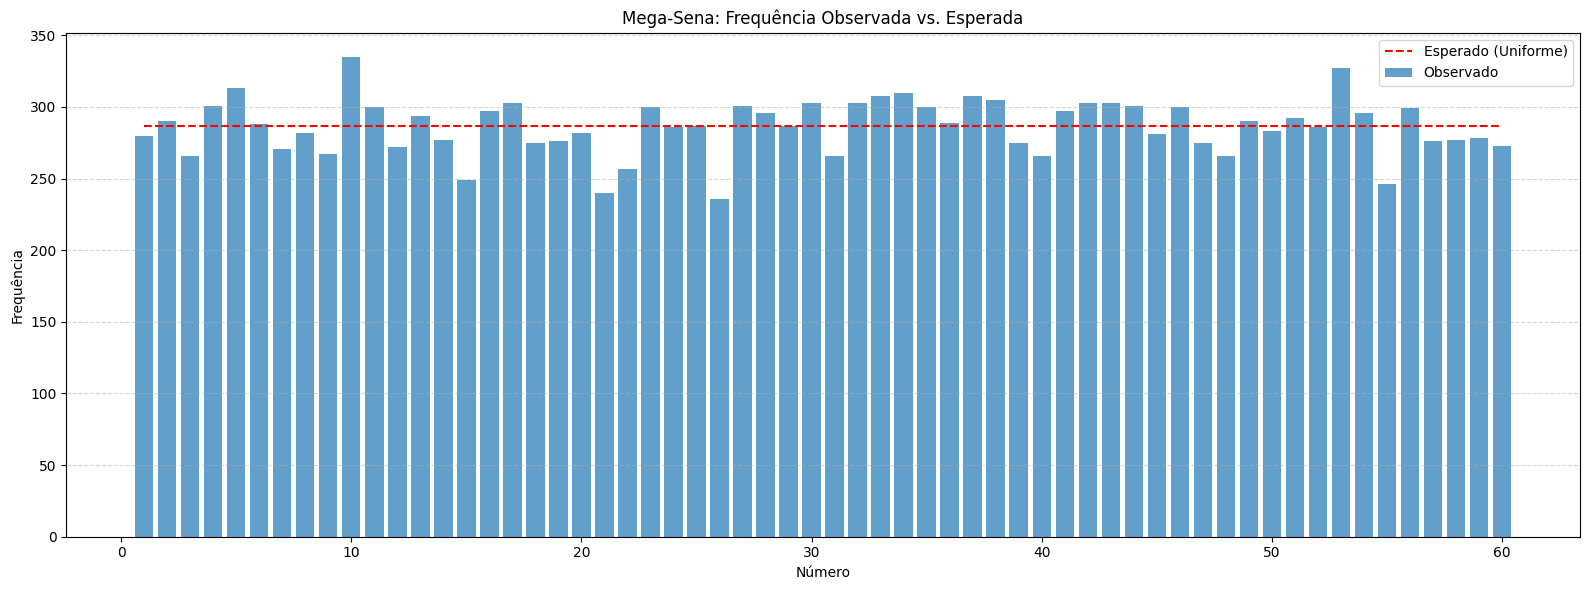

In [4]:
# Dados
observado = df_freqs['total']
esperado = [observado.sum() / len(observado)] * len(observado)  # distribuição uniforme

# Gráfico
plt.figure(figsize=(16, 6))
plt.bar(observado.index, observado, label='Observado', alpha=0.7)
plt.plot(observado.index, esperado, label='Esperado (Uniforme)', color='red', linestyle='--')
plt.xlabel('Número')
plt.ylabel('Frequência')
plt.title('Mega-Sena: Frequência Observada vs. Esperada')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [5]:
numero_mais_frequente = df_freqs['total'].idxmin()
print("Número mais frequente:", numero_mais_frequente)

# Ver todas as linhas onde esse número aparece em qualquer uma das bolas
apareceu_em = mega[
    (mega['bola 1'] == numero_mais_frequente) |
    (mega['bola 2'] == numero_mais_frequente) |
    (mega['bola 3'] == numero_mais_frequente) |
    (mega['bola 4'] == numero_mais_frequente) |
    (mega['bola 5'] == numero_mais_frequente) |
    (mega['bola 6'] == numero_mais_frequente)
]

display(apareceu_em.head(10))

Número mais frequente: 26


,Concurso,Data,bola 1,bola 2,bola 3,bola 4,bola 5,bola 6
15,2850,08/04/2025,43,2,15,1,26,50
51,2814,11/01/2025,26,49,54,19,17,11
63,2802,30/11/2024,17,60,26,21,32,28
90,2775,17/09/2024,1,51,14,44,4,26
112,2753,25/07/2024,46,55,6,31,52,26
121,2744,02/07/2024,34,25,33,10,26,38
129,2736,13/06/2024,35,26,24,11,17,43
141,2724,14/05/2024,24,54,26,21,11,42
152,2713,16/04/2024,58,9,23,35,25,26
181,2684,03/02/2024,26,45,53,48,46,17


In [6]:
# Para cada bola, pega os top 5 números que mais apareceram
top5_por_bola = {}

for bola in colunas_bolas:
    top5 = df_freqs[bola].sort_values(ascending=False).head(5)
    top5_por_bola[bola] = top5

# Mostrar
for bola, top5 in top5_por_bola.items():
    display(f"\nTop 5 números mais frequentes na {bola}:")
    display(top5)

'\nTop 5 números mais frequentes na bola 1:'

bola 1
28    62
35    62
30    60
32    59
49    59
Name: bola 1, dtype: int64

'\nTop 5 números mais frequentes na bola 2:'

bola 1
5     65
10    63
39    61
32    61
53    61
Name: bola 2, dtype: int64

'\nTop 5 números mais frequentes na bola 3:'

bola 1
27    62
56    62
34    61
38    60
41    59
Name: bola 3, dtype: int64

'\nTop 5 números mais frequentes na bola 4:'

bola 1
37    67
60    62
29    61
1     55
34    55
Name: bola 4, dtype: int64

'\nTop 5 números mais frequentes na bola 5:'

bola 1
35    64
10    61
16    60
44    59
45    57
Name: bola 5, dtype: int64

'\nTop 5 números mais frequentes na bola 6:'

bola 1
23    63
33    61
10    58
16    57
53    57
Name: bola 6, dtype: int64